<a href="https://colab.research.google.com/github/AdamPrzychodniPrivate/ml-poverty-prediction/blob/main/pipeline/notebooks/2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run this notebook in Colab

# Install dependencies

In [76]:
%%capture
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

# Import libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import logging
logging.basicConfig(level=logging.INFO)

# Load data

In [78]:
# Download data from repo :)
!wget https://raw.githubusercontent.com/AdamPrzychodniPrivate/ml-poverty-prediction/main/pipeline/data/01_raw/data.csv -O data.csv

--2023-12-30 11:45:41--  https://raw.githubusercontent.com/AdamPrzychodniPrivate/ml-poverty-prediction/main/pipeline/data/01_raw/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9115286 (8.7M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   8.69M  --.-KB/s    in 0.1s    

2023-12-30 11:45:42 (79.6 MB/s) - ‘data.csv’ saved [9115286/9115286]



In [79]:
df = pd.read_csv("/content/data.csv")

In [80]:
df

,Unnamed: 0,URBAN_RURA,alt,chrps,country,deathcount,latnum,longnum,lst,marketm0,...,sif,slope,tree,tt00_500k,year,stunted,wasted,healthy,poorest,underweight_bmi
0,0,1,5.60252,0.437479,Bangladesh,0,22.981516,90.155785,-1.065822,NaN,...,-0.745444,0.021781,16.3438,365.67800,2004,0.294118,0.058824,0.941176,0.071429,0.272727
1,1,1,4.67774,0.447809,Bangladesh,0,22.444431,90.329185,-0.963057,NaN,...,-0.840625,0.007349,0.0000,397.88600,2004,0.444444,0.000000,1.000000,0.062500,0.400000
2,2,1,5.14527,0.453208,Bangladesh,0,22.487263,90.206123,-0.963257,NaN,...,-0.841667,0.005347,0.0000,344.36600,2004,0.600000,0.050000,0.950000,0.000000,0.354839
3,3,1,6.17460,0.433324,Bangladesh,0,23.016359,90.192879,-1.074995,NaN,...,-0.744531,0.027679,16.0333,369.38500,2004,0.500000,0.062500,0.937500,0.062500,0.323529
4,4,1,5.39076,0.406196,Bangladesh,0,22.952404,90.454414,-1.065344,NaN,...,-0.748497,0.025029,18.7647,273.92400,2004,0.555556,0.000000,1.000000,0.111111,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14333,14333,0,212.91400,0.622106,Nigeria,382,7.368560,3.937503,-0.786959,NaN,...,-0.413014,0.508662,0.0000,6.60494,2013,0.250000,0.250000,0.750000,0.000000,0.212121
14334,14334,1,392.34100,1.081900,Nigeria,311,8.570109,3.547449,-0.804163,NaN,...,-0.269682,0.396409,16.6122,271.40400,2013,0.431373,0.176471,0.784314,0.969697,0.347222
14335,14335,1,394.41600,1.080867,Nigeria,311,8.765458,3.603125,-0.780643,NaN,...,-0.248022,0.527184,15.6757,227.03800,2013,0.217391,0.000000,0.956522,0.000000,0.097561
14336,14336,1,389.46400,1.084190,Nigeria,311,8.660406,3.522780,-0.781408,NaN,...,-0.257015,0.390382,21.0244,219.00000,2013,0.195122,0.073171,0.926829,0.379310,0.026316


<h2 align="center">
    &#x1F4A1; <strong>Conclusion</strong> - The Unnamed: 0 column is just an index and we don't need that, will be deleted in EDA - delete it also in preprocessing node
</h2>




In [81]:
# delete 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

In [82]:
df

,URBAN_RURA,alt,chrps,country,deathcount,latnum,longnum,lst,marketm0,marketm1,...,sif,slope,tree,tt00_500k,year,stunted,wasted,healthy,poorest,underweight_bmi
0,1,5.60252,0.437479,Bangladesh,0,22.981516,90.155785,-1.065822,NaN,NaN,...,-0.745444,0.021781,16.3438,365.67800,2004,0.294118,0.058824,0.941176,0.071429,0.272727
1,1,4.67774,0.447809,Bangladesh,0,22.444431,90.329185,-0.963057,NaN,NaN,...,-0.840625,0.007349,0.0000,397.88600,2004,0.444444,0.000000,1.000000,0.062500,0.400000
2,1,5.14527,0.453208,Bangladesh,0,22.487263,90.206123,-0.963257,NaN,NaN,...,-0.841667,0.005347,0.0000,344.36600,2004,0.600000,0.050000,0.950000,0.000000,0.354839
3,1,6.17460,0.433324,Bangladesh,0,23.016359,90.192879,-1.074995,NaN,NaN,...,-0.744531,0.027679,16.0333,369.38500,2004,0.500000,0.062500,0.937500,0.062500,0.323529
4,1,5.39076,0.406196,Bangladesh,0,22.952404,90.454414,-1.065344,NaN,NaN,...,-0.748497,0.025029,18.7647,273.92400,2004,0.555556,0.000000,1.000000,0.111111,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14333,0,212.91400,0.622106,Nigeria,382,7.368560,3.937503,-0.786959,NaN,NaN,...,-0.413014,0.508662,0.0000,6.60494,2013,0.250000,0.250000,0.750000,0.000000,0.212121
14334,1,392.34100,1.081900,Nigeria,311,8.570109,3.547449,-0.804163,NaN,NaN,...,-0.269682,0.396409,16.6122,271.40400,2013,0.431373,0.176471,0.784314,0.969697,0.347222
14335,1,394.41600,1.080867,Nigeria,311,8.765458,3.603125,-0.780643,NaN,NaN,...,-0.248022,0.527184,15.6757,227.03800,2013,0.217391,0.000000,0.956522,0.000000,0.097561
14336,1,389.46400,1.084190,Nigeria,311,8.660406,3.522780,-0.781408,NaN,NaN,...,-0.257015,0.390382,21.0244,219.00000,2013,0.195122,0.073171,0.926829,0.379310,0.026316


# EDA

## Data description

### Target variables

Based on the features there will be 5 target variables we will try to predict

1. stunted (Child Stunting): This would correspond to the measure of children under five years of age whose height-for-age z-score is less than -2.0 standard deviations below the median, as per the WHO Child Growth Standards.

2. wasted (Child Wasting): This would refer to children under five years of age whose weight-for-height is less than -2.0 standard deviations below the median, according to the WHO Child Growth Standards.

3. healthy (Healthy Weight): Likely represents children under five years of age whose weight-for-height falls in the interval of [-2.0, 2.0] standard deviations from the median, as per the WHO Child Growth Standards.

4. poorest (Asset Poverty): This could be the indicator for asset poverty, referring to households in the poorest quintile of an asset-based comparative wealth index.

5. underweight_bmi (Underweight Women): This likely corresponds to women aged 15 to 49 whose body mass index (BMI) is less than 18.5.

In [83]:
# Let's see them :)
target_variables = ['stunted', 'wasted	healthy', 'poorest', 'underweight_bmi']

df_with_target_variables = df[['stunted', 'wasted', 'healthy', 'poorest', 'underweight_bmi']]

In [84]:
df_with_target_variables

,stunted,wasted,healthy,poorest,underweight_bmi
0,0.294118,0.058824,0.941176,0.071429,0.272727
1,0.444444,0.000000,1.000000,0.062500,0.400000
2,0.600000,0.050000,0.950000,0.000000,0.354839
3,0.500000,0.062500,0.937500,0.062500,0.323529
4,0.555556,0.000000,1.000000,0.111111,0.277778
...,...,...,...,...,...
14333,0.250000,0.250000,0.750000,0.000000,0.212121
14334,0.431373,0.176471,0.784314,0.969697,0.347222
14335,0.217391,0.000000,0.956522,0.000000,0.097561
14336,0.195122,0.073171,0.926829,0.379310,0.026316


### Features

- 'URBAN_RURA': Indicates whether a location is in an urban or rural setting, important for understanding geographical and socio-economic differences.
- 'alt': Represents the altitude of a location, impacting climate and environmental conditions.
- 'chrps': Refers to the Climate Hazards Group InfraRed Precipitation with Station data, providing rainfall estimates crucial for agricultural and climate studies.
- 'country'
- 'deathcount': Counts the number of deaths in a given area or period, significant for public health and safety analysis.
- 'latnum'
- 'longnum'
- 'lst': Stands for Land Surface Temperature, key for environmental and climate studies.
'markets0' to 'markets47': Represents a series of variables related to market food prices, essential for understanding economic and food security aspects.
- 'numevents': Counts the number of violent or significant events, used to assess factors like conflict and political instability impacting food security and poverty.
- 'pasture': Indicates pasture coverage, relevant in agricultural land use and environmental studies.
- 'sif': Stands for Solar-Induced chlorophyll Fluorescence, a measure of plant photosynthetic activity, important in agricultural and ecological research.
- 'slope': Measures the steepness or gradient of land, relevant in geographical and environmental analyses.
- 'tree': Indicates tree coverage or density, significant for environmental, ecological, and climate studies.
- 'tt00_500k': Represents travel time or accessibility to urban centers, important for understanding remoteness and its socio-economic impacts.
- 'year': Denotes the year of the data collection, crucial for temporal analysis and understanding trends over time.


## Data profiling

In [85]:
def data_profiling(df: pd.DataFrame, name: str = "data_profiling_report",
                   interface: str = "html", num_columns: int = None, chunk_size: int = 30) -> None:
    """
    This function generates a data profiling report using the pandas_profiling package.

    Args:
        df (pd.DataFrame): The DataFrame to profile.
        name (str, optional): The title of the profile report. Defaults to "data_profiling_report".
        interface (str, optional): The format of the report. Defaults to "html".
                                    Choose between 'html' or 'widget'.
        num_columns (int, optional): Number of columns to include in the report. If None, profiles in chunks of 30 columns.
        chunk_size (int, optional): Size of each chunk for profiling when num_columns is None. Defaults to 30.

    Raises:
        ValueError: If df is not a pandas DataFrame or name is not a string or
                    if interface is not 'html' or 'widget'.
    """

    # Check if df is a pandas DataFrame
    if not isinstance(df, pd.DataFrame):
        raise ValueError("df should be a pandas DataFrame")

    # Check if name is a string
    if not isinstance(name, str):
        raise ValueError("name should be a string")

    # Check if interface is a string and a valid option
    if not isinstance(interface, str) or interface not in ['html', 'widget']:
        raise ValueError("interface should be a string, either 'html' or 'widget'")

    # If num_columns is specified, profile only that many columns
    if num_columns is not None:
        if not isinstance(num_columns, int) or num_columns <= 0:
            raise ValueError("num_columns should be a positive integer")
        columns_to_profile = df.columns[:num_columns]
        df = df[columns_to_profile]
        create_profile(df, name, interface)
    else:
        # If num_columns is not specified, profile in chunks
        for start_col in range(0, len(df.columns), chunk_size):
            end_col = min(start_col + chunk_size, len(df.columns))
            chunk_columns = df.columns[start_col:end_col]
            chunk_df = df[chunk_columns]
            chunk_name = f"{name}_{start_col + 1}-{end_col}"
            create_profile(chunk_df, chunk_name, interface)

def create_profile(df, report_name, interface):
    """ Helper function to create and save the profile report. """
    profile = ProfileReport(df, title=report_name, explorative=True)
    if interface == "html":
        profile.to_file(f"{report_name}.html")
        logging.info(f"Report {report_name} generated in html format, check files.")
    elif interface == "widget":
        logging.info(f"Report {report_name} will be generated as a widget, it might take a while.")
        profile.to_widgets()

# Example usage
# data_profiling(df)
# data_profiling(df, num_columns=5)
# data_profiling(df, specific_columns=['column1', 'column2'])

In [86]:
# data_profiling(df)

## Cleaning data

### Data types

In [87]:
def categorize_column_types(df, unique_threshold=10):
    """
    Counts and categorizes the columns in a Pandas DataFrame into numerical, categorical,
    and potentially categorical (numeric but with low unique value count) types.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    unique_threshold (int): The maximum number of unique values for a numeric column
                            to be considered potentially categorical.

    Returns:
    dict: A dictionary with counts of numerical, categorical, and potentially categorical columns.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")

    categorical = df.select_dtypes(include=['object', 'category']).shape[1]
    numerical = df.select_dtypes(include=['int64', 'float64']).shape[1]

    # Check for numeric columns with low unique value counts
    potentially_categorical = 0
    for col in df.select_dtypes(include=['int64', 'float64']):
        if df[col].nunique() <= unique_threshold:
            potentially_categorical += 1

    return {
        "categorical": categorical,
        "numerical": numerical,
        "potentially_categorical": potentially_categorical
    }

# Example usage
# categorize_column_types(df)

def list_columns_by_type(df, column_type, unique_threshold=10):
    """
    Lists the column names in a DataFrame based on their categorization as
    'categorical', 'numerical', or 'potentially_categorical'.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    column_type (str): Type of columns to list ('categorical', 'numerical', 'potentially_categorical').
    unique_threshold (int): The maximum number of unique values for a numeric column
                            to be considered potentially categorical.

    Returns:
    list: A list of column names that fall into the specified category.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")

    if column_type not in ['categorical', 'numerical', 'potentially_categorical']:
        raise ValueError("column_type must be 'categorical', 'numerical', or 'potentially_categorical'")

    if column_type == 'categorical':
        return df.select_dtypes(include=['object', 'category']).columns.tolist()

    if column_type == 'numerical':
        return df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    if column_type == 'potentially_categorical':
        return [col for col in df.select_dtypes(include=['int64', 'float64']).columns
                if df[col].nunique() <= unique_threshold]

# Example usage
# list_columns_by_type(df, 'potentially_categorical')



In [88]:
categorize_column_types(df)

{'categorical': 1, 'numerical': 115, 'potentially_categorical': 9}

In [89]:
list_columns_by_type(df, 'potentially_categorical')

['URBAN_RURA',
 'marketm36',
 'marketm38',
 'marketm44',
 'marketm46',
 'markets36',
 'markets38',
 'markets44',
 'markets46']

Function which list column classify "marketXYZ" columns as potentially_categorical because they are almost empty they will be deleted later on so... the conclusions is

<h2 align="center">
    &#x1F4A1; <strong>Conclusion</strong> - Change data type of column 'URBAN_RURA' - do it in preprocessing also :)*italicised text*
</h2>

In [90]:
# Convert 'URBAN_RURA' to a categorical column
df.loc[:, 'URBAN_RURA'] = df['URBAN_RURA'].astype('category')

In [91]:
categorize_column_types(df)

{'categorical': 2, 'numerical': 114, 'potentially_categorical': 8}

In [92]:
list_columns_by_type(df, 'categorical')

['URBAN_RURA', 'country']

### Missing data

In [93]:
import pandas as pd

def summarize_missing_values(df, display_all_rows=False):
    """
    Summarize missing values in the DataFrame, showing columns with missing values in descending order,
    and providing a summary of how many columns have and don't have missing values.
    Optionally displays all rows of the summary DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        display_all_rows (bool): If True, display all rows of the summary. Default is False.

    Returns:
        pd.DataFrame: A DataFrame with columns and their missing values count and percentage.
    """
    # Option to display all rows
    if display_all_rows:
        pd.set_option('display.max_rows', None)

    # Count missing values for each column
    missing_values = df.isnull().sum()

    # Calculate the percentage of missing values
    missing_percentage = (missing_values / len(df)) * 100

    # Filter out columns with no missing values and sort in descending order
    missing_summary = pd.DataFrame({'Missing Values': missing_values[missing_values > 0],
                                    'Percentage': missing_percentage[missing_values > 0]})
    missing_summary = missing_summary.sort_values(by='Missing Values', ascending=False)

    # Display the summary DataFrame
    print(missing_summary)

    # Reset display option to default
    if display_all_rows:
        pd.reset_option('display.max_rows')

# Example usage
# summarize_missing_values(df)
# summarize_missing_values(df, display_all_rows=True)



In [94]:
summarize_missing_values(df, display_all_rows=True)

                 Missing Values  Percentage
marketm36                 14334   99.972102
markets36                 14334   99.972102
markets44                 13924   97.112568
marketm44                 13924   97.112568
marketm46                 13920   97.084670
marketm38                 13920   97.084670
markets46                 13920   97.084670
markets38                 13920   97.084670
markets30                 13867   96.715023
marketm30                 13867   96.715023
marketm45                 13518   94.280932
markets45                 13518   94.280932
marketm42                 13518   94.280932
marketm43                 13518   94.280932
markets43                 13518   94.280932
marketm37                 13518   94.280932
marketm39                 13518   94.280932
marketm40                 13518   94.280932
marketm47                 13518   94.280932
marketm41                 13518   94.280932
markets37                 13518   94.280932
markets47                 13518 

<h2 align="center">
    &#x1F4A1; <strong>Conclusion</strong> - Ok so we will drop columns that have more than 40% missing data for the first experiment - define this in the parameters in preprocessing.yaml file - <span style="color:green;">Done &#x2705;</span>
</h2>


In [95]:
# List of features to keep with lower than 40 % of missing data
features = [
    'year',
    'URBAN_RURA',
    'country',
    'alt',
    'chrps',
    'deathcount',
    'latnum',
    'longnum',
    'lst',
    'marketm0',
    'marketm1',
    'marketm2',
    'marketm3',
    'markets0',
    'markets1',
    'markets2',
    'markets3',
    'numevents',
    'pasture',
    'sif',
    'slope',
    'tree',
    'tt00_500k'
]


In [96]:
# Select only the columns specified in 'features' from the DataFrame
df = df[features]

In [97]:
df

,year,URBAN_RURA,country,alt,chrps,deathcount,latnum,longnum,lst,marketm0,...,markets0,markets1,markets2,markets3,numevents,pasture,sif,slope,tree,tt00_500k
0,2004,1,Bangladesh,5.60252,0.437479,0,22.981516,90.155785,-1.065822,NaN,...,NaN,NaN,NaN,NaN,14,0.048795,-0.745444,0.021781,16.3438,365.67800
1,2004,1,Bangladesh,4.67774,0.447809,0,22.444431,90.329185,-0.963057,NaN,...,NaN,NaN,NaN,NaN,14,0.042821,-0.840625,0.007349,0.0000,397.88600
2,2004,1,Bangladesh,5.14527,0.453208,0,22.487263,90.206123,-0.963257,NaN,...,NaN,NaN,NaN,NaN,14,0.030075,-0.841667,0.005347,0.0000,344.36600
3,2004,1,Bangladesh,6.17460,0.433324,0,23.016359,90.192879,-1.074995,NaN,...,NaN,NaN,NaN,NaN,14,0.052236,-0.744531,0.027679,16.0333,369.38500
4,2004,1,Bangladesh,5.39076,0.406196,0,22.952404,90.454414,-1.065344,NaN,...,NaN,NaN,NaN,NaN,14,0.041699,-0.748497,0.025029,18.7647,273.92400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14333,2013,0,Nigeria,212.91400,0.622106,382,7.368560,3.937503,-0.786959,NaN,...,NaN,NaN,67.294732,43.418321,345,0.004750,-0.413014,0.508662,0.0000,6.60494
14334,2013,1,Nigeria,392.34100,1.081900,311,8.570109,3.547449,-0.804163,NaN,...,NaN,NaN,113.518022,43.772564,296,0.001639,-0.269682,0.396409,16.6122,271.40400
14335,2013,1,Nigeria,394.41600,1.080867,311,8.765458,3.603125,-0.780643,NaN,...,NaN,NaN,113.518022,43.772564,296,0.059900,-0.248022,0.527184,15.6757,227.03800
14336,2013,1,Nigeria,389.46400,1.084190,311,8.660406,3.522780,-0.781408,NaN,...,NaN,NaN,113.518022,43.772564,296,0.004605,-0.257015,0.390382,21.0244,219.00000


In [98]:
summarize_missing_values(df, display_all_rows=True)

          Missing Values  Percentage
marketm1            5590   38.987306
markets1            5590   38.987306
marketm0            4447   31.015483
markets0            4447   31.015483
marketm2            4381   30.555168
markets2            4381   30.555168
marketm3            4072   28.400056
markets3            4072   28.400056
lst                  579    4.038220
sif                  229    1.597154
chrps                209    1.457665


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def explore_missing_values(df):
    """
    Visualizes the pattern of missing values in a pandas DataFrame using a heatmap.

    The function creates a heatmap where missing values are marked, helping to identify
    the pattern of missingness across different columns.

    Parameters:
    - df (pandas.DataFrame): The DataFrame to analyze for missing values.

    Returns:
    - None: The function outputs a visualization and does not return any value.

    Usage:
    - explore_missing_values(df)

    Note: The function requires pandas, matplotlib, and seaborn libraries. Ensure
    these are installed and imported before using the function.
    """

    # Missing data heatmap
    plt.figure(figsize=(12, 8))
    # Using a custom color map: red for missing, green for not missing
    sns.heatmap(df.isnull(), cbar=False, cmap=sns.color_palette(["green", "red"]))
    plt.title("Heatmap of Missing Values")
    plt.show()

# Example usage:
# explore_missing_values(df)


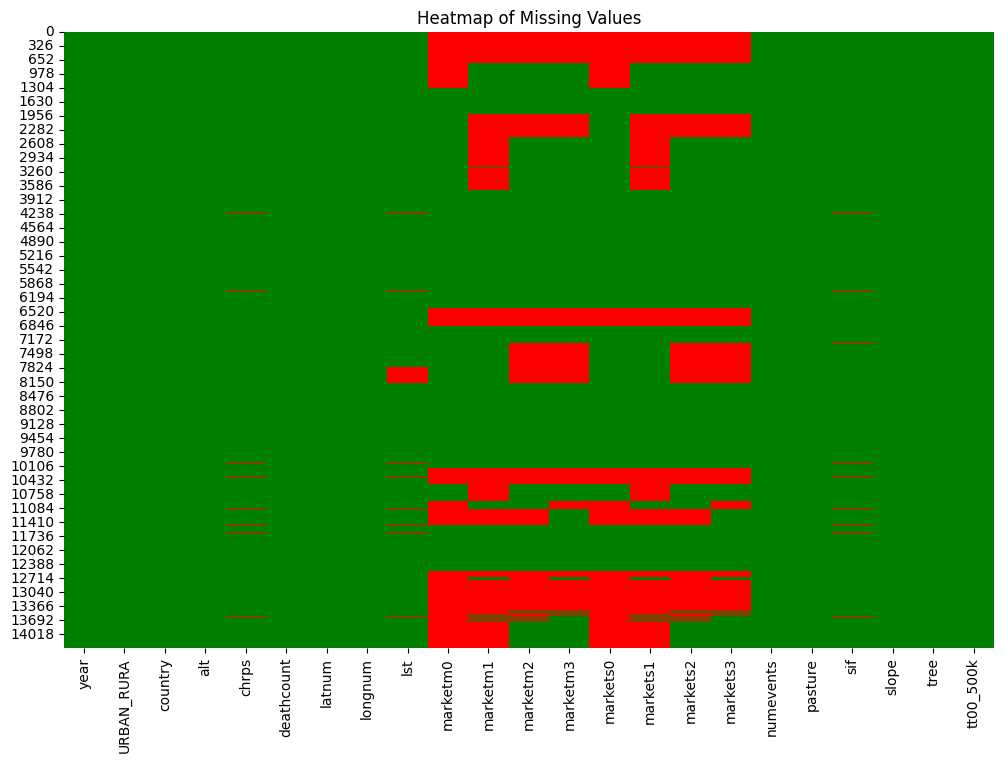

In [100]:
explore_missing_values(df)

In [101]:
df

,year,URBAN_RURA,country,alt,chrps,deathcount,latnum,longnum,lst,marketm0,...,markets0,markets1,markets2,markets3,numevents,pasture,sif,slope,tree,tt00_500k
0,2004,1,Bangladesh,5.60252,0.437479,0,22.981516,90.155785,-1.065822,NaN,...,NaN,NaN,NaN,NaN,14,0.048795,-0.745444,0.021781,16.3438,365.67800
1,2004,1,Bangladesh,4.67774,0.447809,0,22.444431,90.329185,-0.963057,NaN,...,NaN,NaN,NaN,NaN,14,0.042821,-0.840625,0.007349,0.0000,397.88600
2,2004,1,Bangladesh,5.14527,0.453208,0,22.487263,90.206123,-0.963257,NaN,...,NaN,NaN,NaN,NaN,14,0.030075,-0.841667,0.005347,0.0000,344.36600
3,2004,1,Bangladesh,6.17460,0.433324,0,23.016359,90.192879,-1.074995,NaN,...,NaN,NaN,NaN,NaN,14,0.052236,-0.744531,0.027679,16.0333,369.38500
4,2004,1,Bangladesh,5.39076,0.406196,0,22.952404,90.454414,-1.065344,NaN,...,NaN,NaN,NaN,NaN,14,0.041699,-0.748497,0.025029,18.7647,273.92400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14333,2013,0,Nigeria,212.91400,0.622106,382,7.368560,3.937503,-0.786959,NaN,...,NaN,NaN,67.294732,43.418321,345,0.004750,-0.413014,0.508662,0.0000,6.60494
14334,2013,1,Nigeria,392.34100,1.081900,311,8.570109,3.547449,-0.804163,NaN,...,NaN,NaN,113.518022,43.772564,296,0.001639,-0.269682,0.396409,16.6122,271.40400
14335,2013,1,Nigeria,394.41600,1.080867,311,8.765458,3.603125,-0.780643,NaN,...,NaN,NaN,113.518022,43.772564,296,0.059900,-0.248022,0.527184,15.6757,227.03800
14336,2013,1,Nigeria,389.46400,1.084190,311,8.660406,3.522780,-0.781408,NaN,...,NaN,NaN,113.518022,43.772564,296,0.004605,-0.257015,0.390382,21.0244,219.00000


Ok so based on heatmap above and manual explortion of the data I think that of course we have patterns in our dataset. I think it could be missing data for particular country in particular year lets check that

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_missing_values_by_group(df, group_columns, value_column):
    """
    Visualizes missing values in the DataFrame grouped by specified columns using a heatmap,
    showing both counts and percentages of missing values. If no missing values are found,
    prints a message indicating this.

    Parameters:
    - df (pd.DataFrame): The DataFrame to analyze.
    - group_columns (list of str): The column names to group the data by.
    - value_column (str): The name of the column with missing values to analyze.

    Returns:
    - None: Displays seaborn heatmap visualizations of missing values by the specified groups or a message if no missing values are present.
    """

    # Create a DataFrame that counts missing values for each group
    missing_counts = df.groupby(group_columns)[value_column].apply(lambda x: x.isnull().sum()).reset_index(name='missing_count')
    total_counts = df.groupby(group_columns)[value_column].apply(lambda x: len(x)).reset_index(name='total_count')

    # Merge the missing counts with total counts to calculate percentages
    missing_data = pd.merge(missing_counts, total_counts, on=group_columns)
    missing_data['missing_percentage'] = (missing_data['missing_count'] / missing_data['total_count']) * 100

    if missing_data['missing_count'].sum() == 0:
        # If there are no missing values, print the information and return
        print(f"No missing values found in column '{value_column}'.")
        return

    # Pivot the DataFrame to prepare for heatmap visualization
    missing_counts_pivot = missing_data.pivot(index=group_columns[0], columns=group_columns[1], values='missing_count')
    missing_percentage_pivot = missing_data.pivot(index=group_columns[0], columns=group_columns[1], values='missing_percentage')

    # Plot the heatmap for missing counts
    plt.figure(figsize=(15, 8))
    sns.heatmap(missing_counts_pivot, annot=True, fmt=".0f", cmap='RdYlGn_r', center=0)
    plt.title(f'Missing Values Count in {value_column} by {" and ".join(group_columns)}')
    plt.show()

    # Plot the heatmap for missing percentages
    plt.figure(figsize=(15, 8))
    sns.heatmap(missing_percentage_pivot, annot=True, fmt=".1f", cmap='RdYlGn_r', center=0)
    plt.title(f'Missing Values Percentage in {value_column} by {" and ".join(group_columns)}')
    plt.show()

# Example usage:
# visualize_missing_values_by_group(df, ['country', 'year'], 'marketm0')


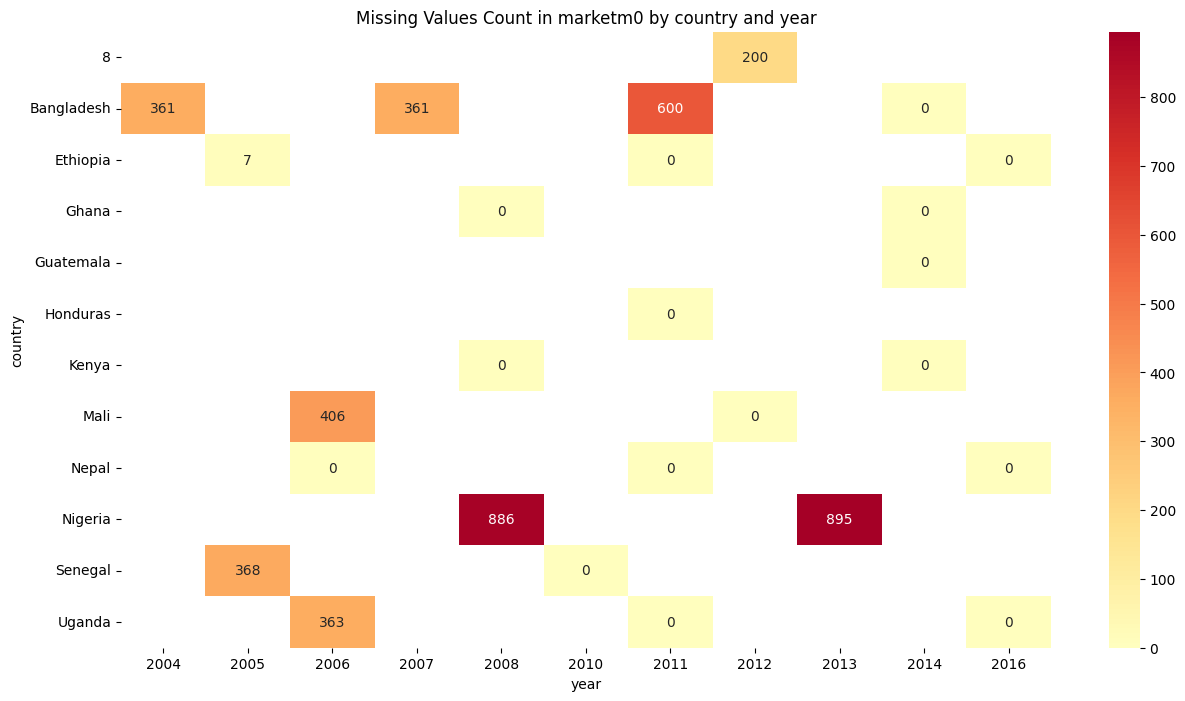

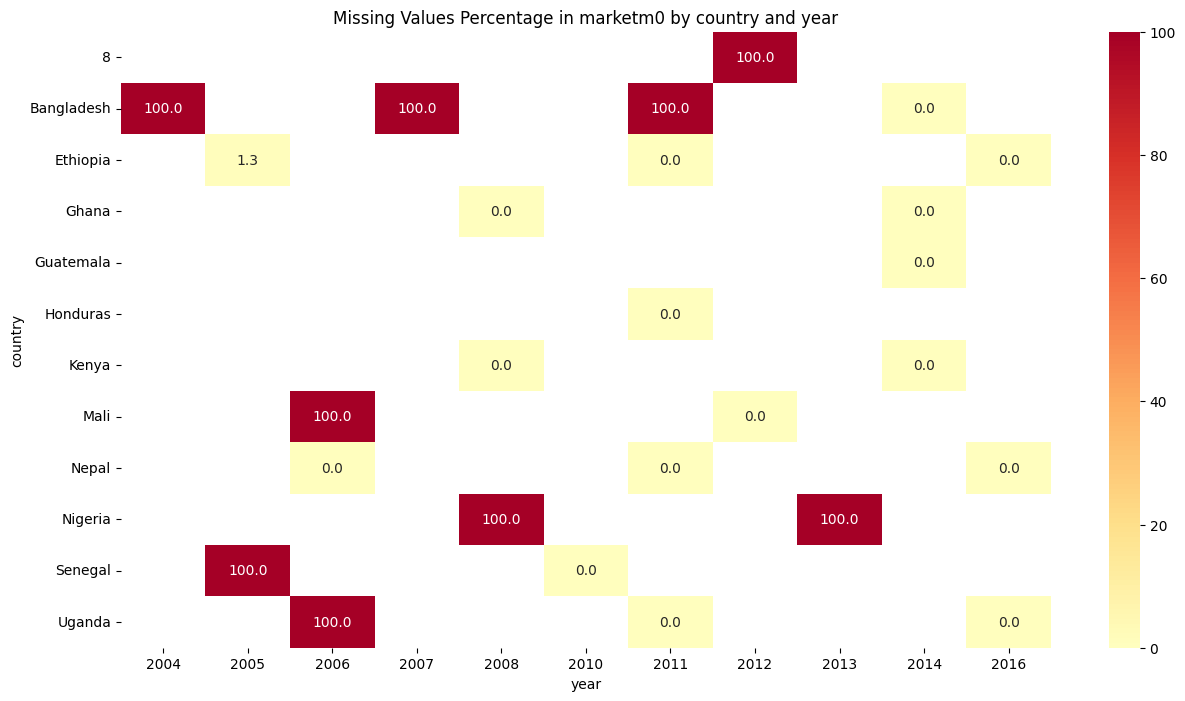

In [104]:
visualize_missing_values_by_group(df, ['country', 'year'], 'marketm0')

Yeah :) so we can see the patterns, also there is the country called 8 which I don't know what country that is for now we will delete that so conclusions ...

<h2 align="center">
    &#x1F4A1; <strong>Conclusion</strong> - We will drop rows for:
</h2>
<ul>
    <li>all rows with country called 8</li>
    <li>Bangladesh for years 2004, 2007, 2001</li>
    <li>Mali for the year 2006</li>
    <li>Nigeria for years 2008, 2013</li>
    <li>Senegal for the year 2005</li>
    <li>Uganda for the year 2006</li>
</ul>



In [105]:
import pandas as pd

def drop_rows_with_values(df, *args):
    """
    Drops rows based on specified conditions. Conditions can be a single value for a column,
    or multiple values for a column using a tuple with the column name followed by the values.

    Parameters:
    - df (pd.DataFrame): The DataFrame from which to drop rows.
    - args: A sequence of arguments where each argument can be:
            - A tuple of (column_name, value), to drop rows where column_name is value, or
            - A tuple of (column_name, value1, value2, ...), to drop rows where column_name is any of value1, value2, ...

    Returns:
    - pd.DataFrame: A DataFrame with the specified rows dropped.
    """

    # Process each argument provided to the function
    for arg in args:
        if not isinstance(arg, tuple):
            raise TypeError("Each argument must be a tuple containing the column name and value(s) to drop.")

        column_name = arg[0]
        values_to_drop = arg[1:]

        # Ensure the column exists in the DataFrame
        if column_name not in df.columns:
            raise ValueError(f"The column '{column_name}' is not in the DataFrame")

        # If only one value is provided, use equality
        if len(values_to_drop) == 1:
            df = df[df[column_name] != values_to_drop[0]]
        else:
            # If multiple values are provided, use isin to check for membership
            df = df[~df[column_name].isin(values_to_drop)]

    return df

# Example usage:
# To drop all rows with country '8'
# df = drop_rows_with_values(df, ('country', '8'))

# To drop rows with Bangladesh in 'country' and years 2004, 2007, 2001 in 'year'
# df = drop_rows_with_values(df, ('country', 'Bangladesh'), ('year', 2004, 2007, 2001))


In [106]:
# so first we drop rows with country called 8
df = drop_rows_with_values(df, ('country', '8'))

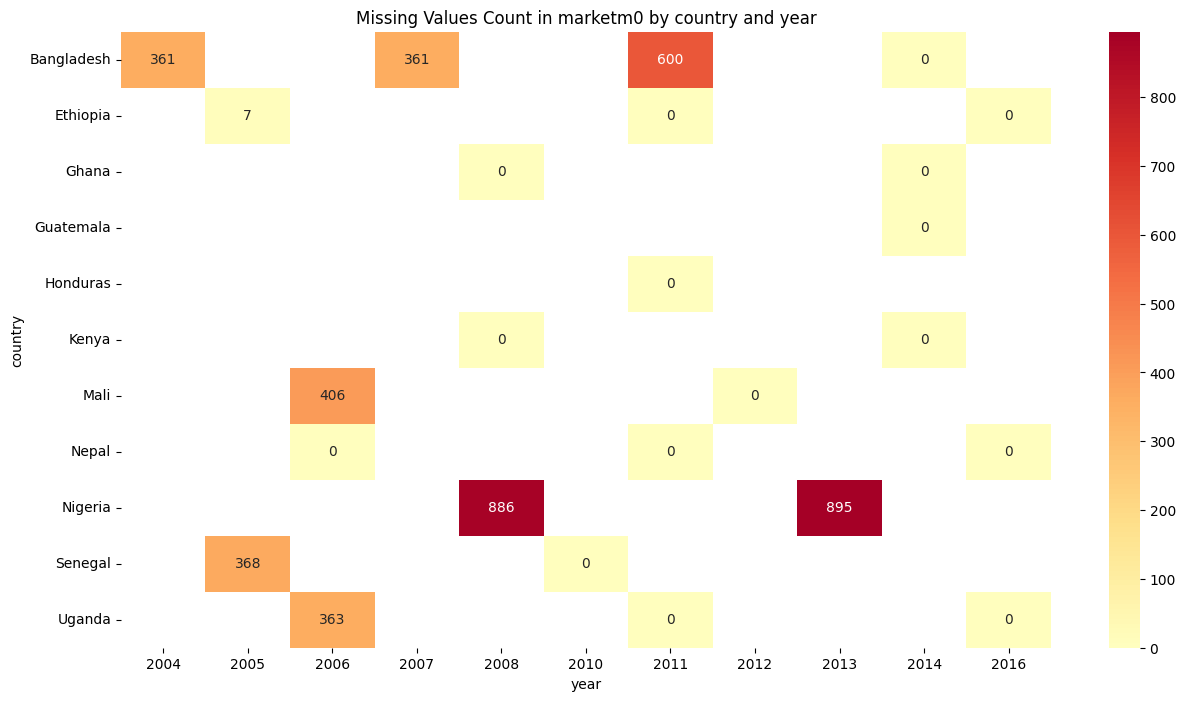

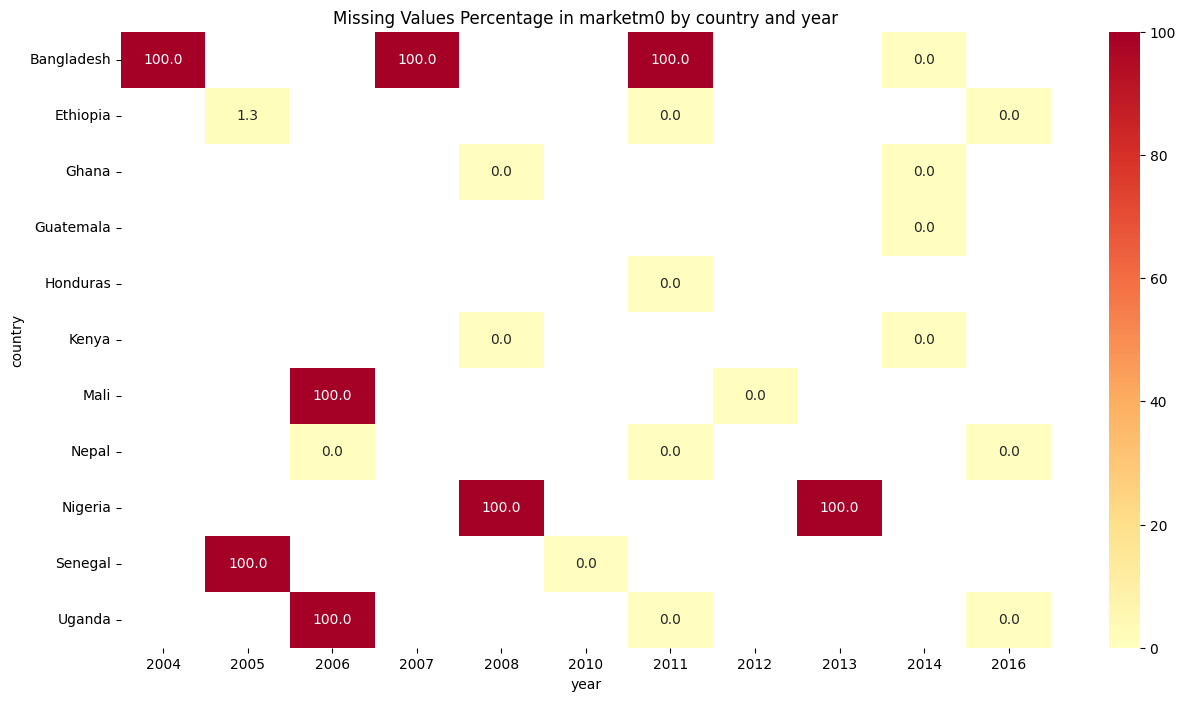

In [107]:
visualize_missing_values_by_group(df, ['country', 'year'], 'marketm0')

In [108]:
# now the rest of rows :)

# so first we drop rows with country called 8
df = drop_rows_with_values(df, ('country', 'Bangladesh'), ('year', 2001, 2004, 2007))
df = drop_rows_with_values(df, ('country', 'Mali'), ('year', 2006))
df = drop_rows_with_values(df, ('country', 'Nigeria'), ('year', 2008, 2013))
df = drop_rows_with_values(df, ('country', 'Senegal'), ('year', 2005))
df = drop_rows_with_values(df, ('country', 'Uganda'), ('year', 2006))

In [113]:
visualize_missing_values_by_group(df, ['country', 'year'], 'marketm0')

No missing values found in column 'marketm0'.


so now lets do the same for the rest

In [111]:
summarize_missing_values(df, display_all_rows=True)

          Missing Values  Percentage
marketm1            1185   20.291096
markets1            1185   20.291096
marketm2             657   11.250000
marketm3             657   11.250000
markets2             657   11.250000
markets3             657   11.250000
lst                  429    7.345890
chrps                 59    1.010274
sif                   59    1.010274


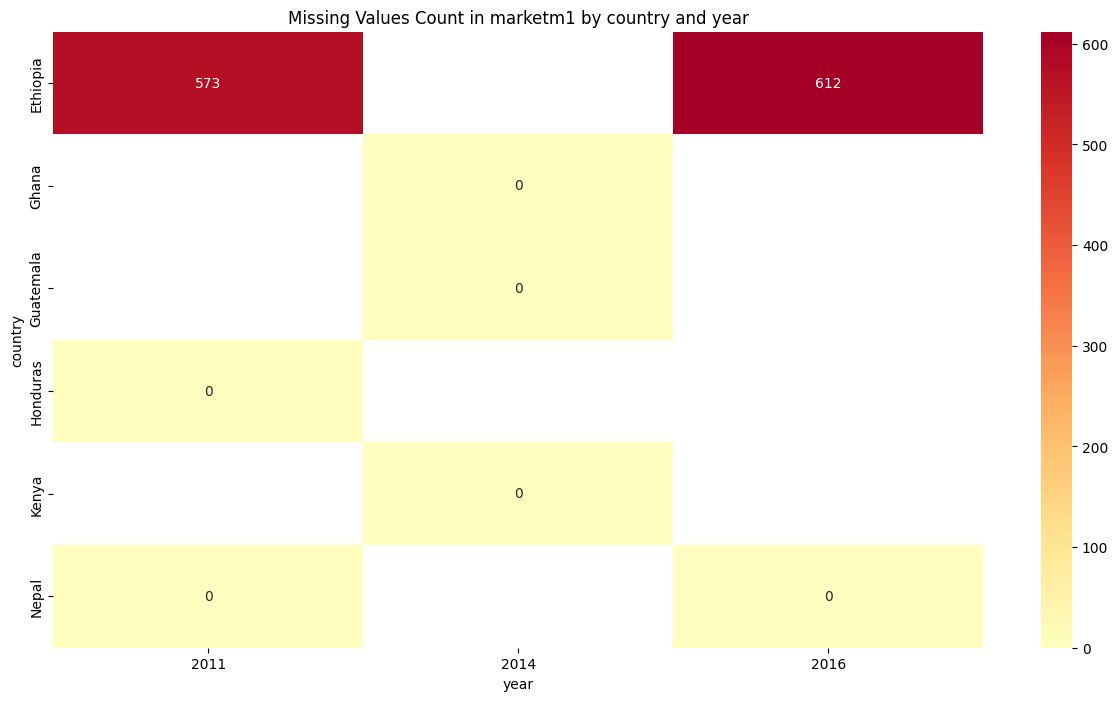

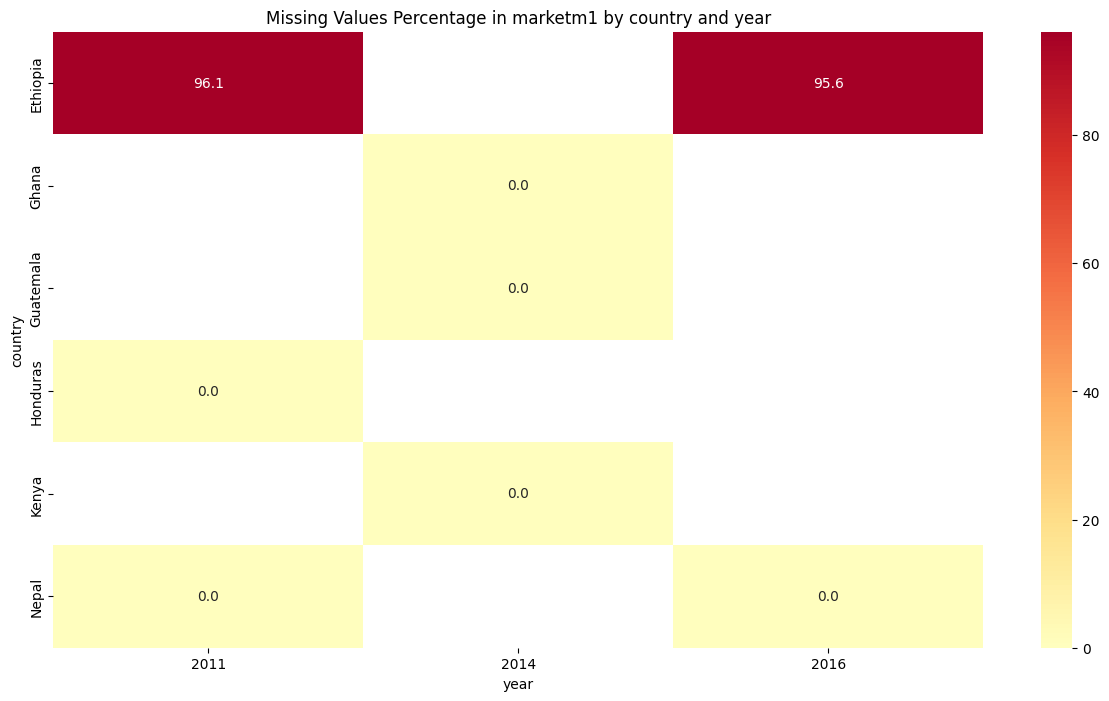

In [112]:
visualize_missing_values_by_group(df, ['country', 'year'], 'marketm1')

In [114]:
df = drop_rows_with_values(df, ('country', 'Ethiopia'), ('year', 2011, 2016))

In [115]:
visualize_missing_values_by_group(df, ['country', 'year'], 'marketm1')

No missing values found in column 'marketm1'.


In [116]:
summarize_missing_values(df, display_all_rows=True)

       Missing Values  Percentage
chrps              15    0.533428
lst                15    0.533428
sif                15    0.533428


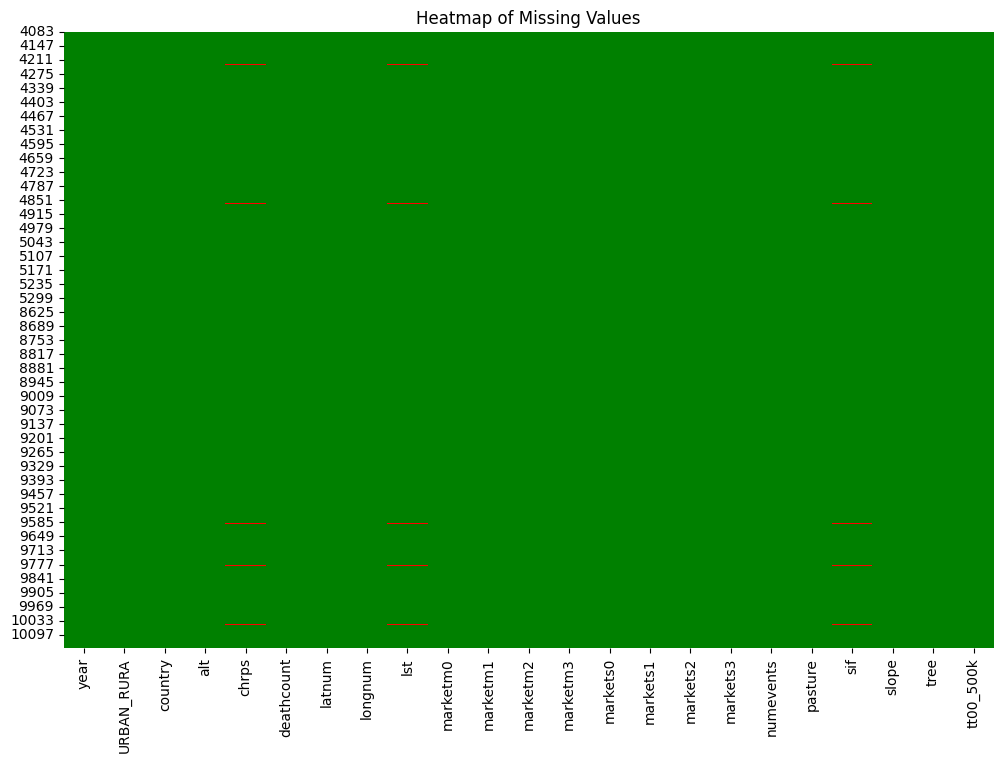

In [117]:
explore_missing_values(df)

ok great so the rest of the missing values are really small so we drop them